In [1]:
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools, algorithms
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [3]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [4]:
all_features = np.load('/Users/saikarthik/Desktop/scp/model_building/f.npy')
all_labels = np.load('/Users/saikarthik/Desktop/scp/model_building/l.npy')



In [5]:
all_features.shape

(6672, 52047)

In [6]:
all_labels.shape

(6672, 4)

In [7]:
y = np.argmax(all_labels, axis=1)

In [8]:
y

array([3, 3, 3, ..., 2, 2, 2])

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split( all_features, y, test_size=0.2, random_state=42 )

In [10]:
num_classes=4


In [11]:
def evaluate_model(individual):
    num_layers = int(individual[0])  
    neurons_per_layer = individual[1]
    dropout_rate = individual[2]

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))

    for _ in range(num_layers):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0, callbacks=[early_stopping])

    _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    return accuracy,  

In [12]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("num_layers", lambda: random.choice([2, 3, 4, 5])) 
toolbox.register("neurons_per_layer", lambda: random.choice([128, 256, 512, 1024]))
toolbox.register("dropout_rate", lambda: random.uniform(0.1, 0.5))  

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.num_layers, toolbox.neurons_per_layer, toolbox.dropout_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_model)
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutPolynomialBounded, low=[2, 128, 0.1], up=[5, 1024, 0.5], eta=1.0, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)


In [13]:
population = toolbox.population(n=10) 
NGEN = 5
CXPB, MUTPB = 0.5, 0.2 

best_accuracy = 0 
best_model = None 

for gen in range(NGEN):
    print(f"Generation {gen+1}")
    
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    population[:] = toolbox.select(offspring, len(population))

    best_ind = tools.selBest(population, 1)[0]
    current_accuracy = best_ind.fitness.values[0]

    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        num_layers = int(best_ind[0])
        neurons_per_layer = int(best_ind[1])
        dropout_rate = best_ind[2]
        best_model = models.Sequential()
        best_model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
        for _ in range(num_layers):
            best_model.add(layers.Dense(neurons_per_layer, activation='relu'))
            best_model.add(layers.Dropout(dropout_rate))

        best_model.add(layers.Dense(4, activation='softmax'))

        best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Best individual in generation {gen}: {best_ind}")
    print(f"Best fitness in generation {gen}: {best_ind.fitness.values[0]}")

print(f"Best individual after all generations: {best_ind}")
print(f"Best fitness after all generations: {best_ind.fitness.values[0]}")


Generation 1
Best individual in generation 0: [4.695583738352336, 213.89320789295306, 0.25942877542046444]
Best fitness in generation 0: 0.9198501706123352
Generation 2
Best individual in generation 1: [5, 128, 0.1571030226934402]
Best fitness in generation 1: 0.9198501706123352
Generation 3
Best individual in generation 2: [5, 128, 0.11608061709557163]
Best fitness in generation 2: 0.9250936508178711
Generation 4
Best individual in generation 3: [5, 128, 0.11608061709557163]
Best fitness in generation 3: 0.9250936508178711
Generation 5
Best individual in generation 4: [5, 128, 0.1571030226934402]
Best fitness in generation 4: 0.9310861229896545
Best individual after all generations: [5, 128, 0.1571030226934402]
Best fitness after all generations: 0.9310861229896545


In [14]:
best_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 128)               6662144   
                                                                 
 dropout_139 (Dropout)       (None, 128)               0         
                                                                 
 dense_172 (Dense)           (None, 128)               16512     
                                                                 
 dropout_140 (Dropout)       (None, 128)               0         
                                                                 
 dense_173 (Dense)           (None, 128)               16512     
                                                                 
 dropout_141 (Dropout)       (None, 128)               0         
                                                                 
 dense_174 (Dense)           (None, 128)             

In [15]:
history = best_model.fit(x_train, y_train, epochs=20, batch_size=64,validation_data=[x_train, y_train])


Epoch 1/20
84/84 [==============================] - 2s 20ms/step - loss: 1.3604 - accuracy: 0.5160 - val_loss: 0.7378 - val_accuracy: 0.6848
Epoch 2/20
84/84 [==============================] - 1s 12ms/step - loss: 0.9458 - accuracy: 0.6678 - val_loss: 0.4342 - val_accuracy: 0.8475
Epoch 3/20
84/84 [==============================] - 1s 13ms/step - loss: 0.5319 - accuracy: 0.8224 - val_loss: 0.2073 - val_accuracy: 0.9502
Epoch 4/20
84/84 [==============================] - 1s 12ms/step - loss: 0.3685 - accuracy: 0.8943 - val_loss: 0.1599 - val_accuracy: 0.9610
Epoch 5/20
84/84 [==============================] - 1s 12ms/step - loss: 0.2632 - accuracy: 0.9320 - val_loss: 0.0769 - val_accuracy: 0.9781
Epoch 6/20
84/84 [==============================] - 1s 12ms/step - loss: 0.1710 - accuracy: 0.9548 - val_loss: 0.0534 - val_accuracy: 0.9850
Epoch 7/20
84/84 [==============================] - 1s 12ms/step - loss: 0.1443 - accuracy: 0.9599 - val_loss: 0.0536 - val_accuracy: 0.9835
Epoch 8/20
84

In [22]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

42/42 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.9461
Test Loss: 0.36594435572624207
Test Accuracy: 0.9460673928260803


In [17]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


42/42 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       197
           1       0.71      0.83      0.77        18
           2       0.97      0.97      0.97       645
           3       0.93      0.95      0.94       475

    accuracy                           0.95      1335
   macro avg       0.89      0.91      0.90      1335
weighted avg       0.95      0.95      0.95      1335



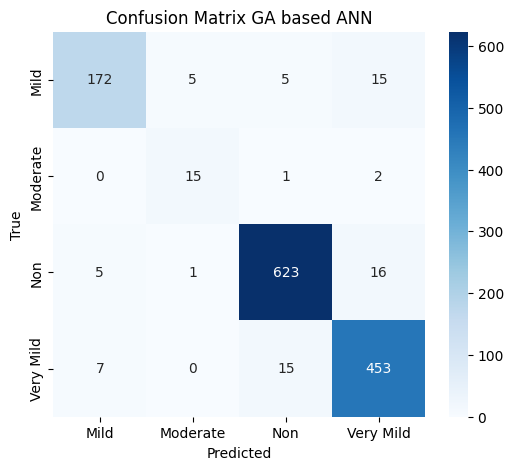

In [28]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mild", "Moderate", "Non", "Very Mild"], yticklabels=["Mild", "Moderate", "Non", "Very Mild"])
plt.title("Confusion Matrix GA based ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

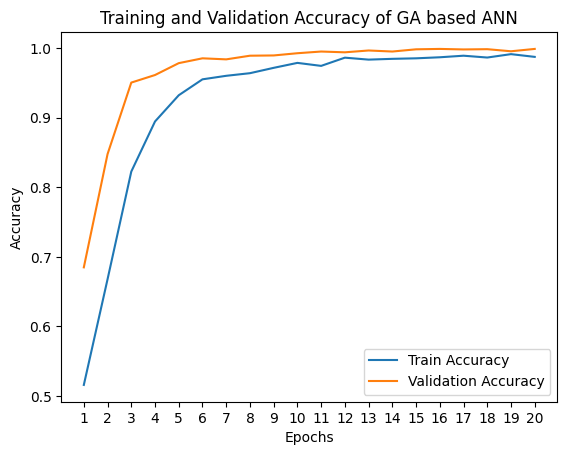

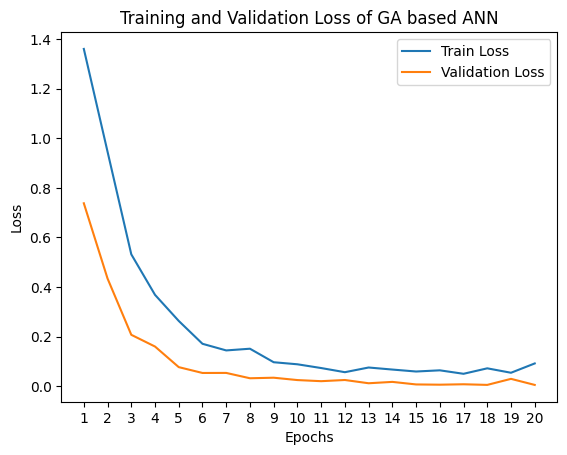

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of GA based ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(len(history.history['accuracy'])), range(1, len(history.history['accuracy']) + 1))
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of GA based ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(len(history.history['loss'])), range(1, len(history.history['loss']) + 1))
plt.show()


In [26]:
predictions = best_model.predict(x_test)
final_predictions = np.argmax(predictions, axis=1)

loss, accuracy = best_model.evaluate(x_test, y_test, verbose=1)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, final_predictions, target_names=["Mild", "Moderate", "Non", "Very Mild"]))

42/42 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.9461
Model Loss: 0.3659
Model Accuracy: 0.9461
Classification Report:
              precision    recall  f1-score   support

        Mild       0.93      0.87      0.90       197
    Moderate       0.71      0.83      0.77        18
         Non       0.97      0.97      0.97       645
   Very Mild       0.93      0.95      0.94       475

    accuracy                           0.95      1335
   macro avg       0.89      0.91      0.90      1335
weighted avg       0.95      0.95      0.95      1335



In [23]:
best_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 128)               6662144   
                                                                 
 dropout_139 (Dropout)       (None, 128)               0         
                                                                 
 dense_172 (Dense)           (None, 128)               16512     
                                                                 
 dropout_140 (Dropout)       (None, 128)               0         
                                                                 
 dense_173 (Dense)           (None, 128)               16512     
                                                                 
 dropout_141 (Dropout)       (None, 128)               0         
                                                                 
 dense_174 (Dense)           (None, 128)             

In [27]:
best_model.save("ga_ann.h5")

/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
